# **Regresion Lineal**

Algoritmo de tipo supervisado, con datos de entrada etiquetados.

Me indica la tendencia de los datos.

Saber en base a unos datos el comportamiento futuro.

Se modelara la relacion entre una variable dependiente Y una explicativa llamada X

En la regresión lineal generamos, a partir de los datos, una recta y es a partir de esta que podremos encontrar la tendencia o predicción.

Generalmente es importante tener en cuenta varias dimensiones o variables al considerar los datos que estamos suministrando al modelo, recordando siempre cuidar este set de sobreajuste o subajuste.

Cuando nuestro modelo considera más de dos variables el algoritmo de regresión que usamos se conoce como Regresión Lineal Múltiple y este trabaja sobre un sistema de referencia conocido como hiperplano.

Los algoritmos de regresión, tanto lineal como múltiple trabajan únicamente con datos de tipo cuantitativos.

# **Regresion Lineal Simple**

En base al dataset salarios.csv

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
dataset = pd.read_csv("/content/salarios.csv")

In [19]:
dataset.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [20]:
#ejemplos a trabajar
dataset.shape

(30, 2)

In [21]:
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:,1].values

In [22]:
#dividir la informacion, 80% valores exclusivos para entrenamiento, random 0 mismo datos
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [23]:
X_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

# **Crear modelo**

In [24]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Graficamos los datos de entrenamiento

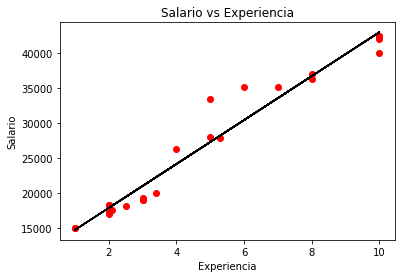

In [25]:
viz_train = plt
viz_train.scatter(X_train, Y_train, color = "red")
#predict trae toda la informacion
viz_train.plot(X_train, regressor.predict(X_train), color = "black")
viz_train.title("Salario vs Experiencia")
viz_train.xlabel ("Experiencia")
viz_train.ylabel ("Salario")
viz_train.show()

Si esta cerca de la recta, aprendio un poco mas 
para validar lo haremos con nuestros datos de prueba de nuevo

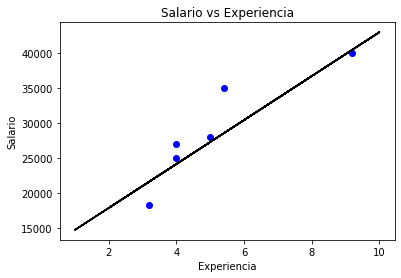

In [26]:
viz_train = plt
viz_train.scatter(X_test, Y_test, color = "blue")
#predict trae toda la informacion
viz_train.plot(X_train, regressor.predict(X_train), color = "black")
viz_train.title("Salario vs Experiencia")
viz_train.xlabel ("Experiencia")
viz_train.ylabel ("Salario")
viz_train.show()

78% de los nuevos datos a utilzar para validar lo hara de manera correcta, lo otro no lo estara tan cerca. 

Se puede mejorar por medio de cambio en datos o realizando una lineal multiple en donde se consideren otras variables.

In [27]:
regressor.score(X_test, Y_test)

0.7862437374732997

# **Prediccion de salario tambien en base a paises**

In [28]:
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

In [29]:
# defino los paises en list paises
paises = ['CO','BR','PE','MX']

In [30]:
# llevo cada elemento de paises a que sea convertido a un numero para poder procesarlo
le1 = preprocessing.LabelEncoder()
paises_encoded = le1.fit_transform(paises)

In [32]:
# de forma aleatoria creo 30 elementos para dataset
paises_dataset = [random.choice(paises_encoded) for i in range(len(dataset))]

In [33]:
# paises codificados y en lista pasados al dataset
dataset['pais'] = paises_dataset

Regresion Lineal

In [34]:
# Dividiendo las columnas en x y y
x = dataset.drop('Salario', axis=1)
y = dataset.iloc[:,1].values

# dividimos nuestro dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Invocamos el modelo y creamos el modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Evaluamos performance
print(regressor.score(X_test, Y_test))

0.7855942344453235


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

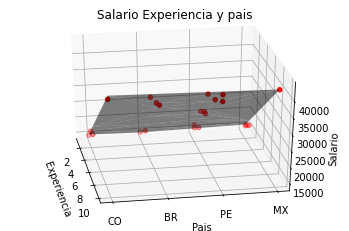

In [37]:
# ploteamos datos de entrenamiento para ver si realmente el 
# modelo lo hizo bien, se entreno como se debe
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_train['Aexperiencia'],X_train['pais'], Y_train, color = 'red')
viz_train.plot_trisurf(X_train['Aexperiencia'],X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show

Resultados para test

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

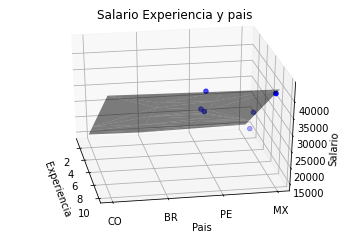

In [38]:
# probamos con datos de test
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_test['Aexperiencia'],X_test['pais'], Y_test, color = 'blue')
viz_train.plot_trisurf(X_train['Aexperiencia'], X_train['pais'], regressor.predict(X_train),color = 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show

# **Otra manera de realizarlo mejor**

In [39]:
dataset = pd.read_csv('salarios.csv')
paises = ['VZ','MX','CO','BR','AR','US']
new_column = [paises[np.random.randint(0,len(paises))] for i in range(30) ]
dataset['Pais'] = new_column
dataset['NormPaises'] = pd.factorize(dataset['Pais'])[0]
x = dataset[['Aexperiencia','NormPaises']]
y = dataset['Salario']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.6, random_state=0)
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.9354753560694127

Graficamos

Text(0.5, 0, '$Salario$')

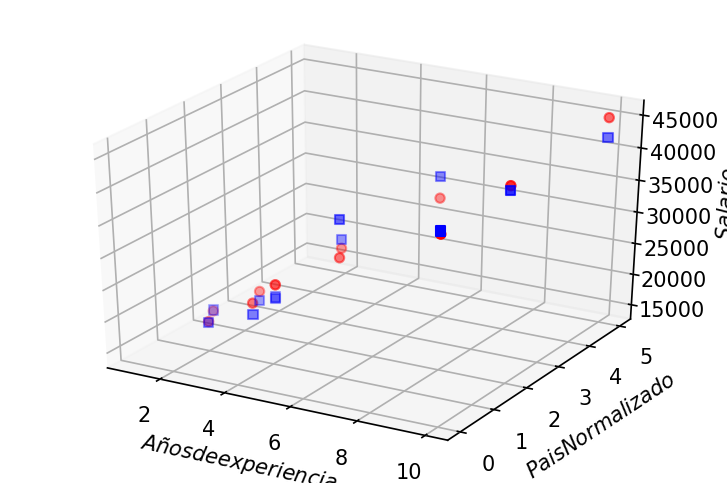

In [43]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Aexperiencia'],X_train['NormPaises'],y_train,c='b',marker='s')
ax.scatter(X_train['Aexperiencia'],X_train['NormPaises'],regressor.predict(X_train),c='r',marker='o')

ax.set_xlabel('$Años de experiencia$')
ax.set_ylabel('$Pais  Normalizado$')
ax.set_zlabel('$Salario$')